In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv("I:/clg/Code/50_Startups.csv")

In [4]:
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing Values:\n', missing_values)

Missing Values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [6]:
# Drop missing values
df.dropna(inplace=True)

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('IQR:\n', IQR)

IQR:
 R&D Spend           61666.4300
Administration      41111.3050
Marketing Spend    170168.9525
Profit              49627.0750
dtype: float64


C:\Users\drong\AppData\Local\Temp\ipykernel_10196\2888874394.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\drong\AppData\Local\Temp\ipykernel_10196\2888874394.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [9]:
# Drop outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\drong\AppData\Local\Temp\ipykernel_10196\1527238454.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
# Normalize the data
df_norm = (df - df.mean()) / df.std()

C:\Users\drong\AppData\Local\Temp\ipykernel_10196\1873925149.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_norm = (df - df.mean()) / df.std()
C:\Users\drong\AppData\Local\Temp\ipykernel_10196\1873925149.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_norm = (df - df.mean()) / df.std()


In [11]:
# Save the cleaned and prepared dataset
df_norm.to_csv('I:/clg/Code/cleaned_dataset.csv', index=False)

In [15]:
# Load dataset
data = pd.read_csv('I:/clg/Code/cleaned_dataset.csv')
data

,Administration,Marketing Spend,Profit,R&D Spend,State
0,0.546417,2.124108,2.050309,1.997623,NaN
1,1.058053,1.893968,2.038002,1.936635,NaN
2,-0.716868,1.597158,2.018572,1.733683,NaN
3,-0.097586,1.393021,1.805102,1.532662,NaN
4,-1.061512,1.252462,1.367232,1.482456,NaN
5,-0.763892,1.225169,1.126296,1.255693,NaN
6,0.910400,-0.715477,1.103541,1.316394,NaN
7,0.851433,0.903429,1.093850,1.220699,NaN
8,0.964111,0.802219,1.001088,1.004461,NaN
9,-0.450672,0.747488,0.936856,1.066355,NaN


In [16]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['Administration', 'Marketing Spend', 'R&D Spend']], data['Profit'], test_size=0.3, random_state=0)

In [17]:
# Apply multiple linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
print('R2 Score (Multiple Linear Regression): ', r2_score(y_test, linear_reg_pred))

R2 Score (Multiple Linear Regression):  0.9423501956468417


In [18]:
# Apply KNN regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_reg_pred = knn_reg.predict(X_test)
print('R2 Score (KNN Regression): ', r2_score(y_test, knn_reg_pred))

R2 Score (KNN Regression):  0.7317396440546924


In [20]:
# Apply Lasso regression
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
lasso_reg_pred = lasso_reg.predict(X_test)
print('R2 Score (Lasso Regression): ', r2_score(y_test, lasso_reg_pred))

R2 Score (Lasso Regression):  0.944824822949891


In [21]:
# Apply Ridge regression
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)
print('R2 Score (Ridge Regression): ', r2_score(y_test, ridge_reg_pred))

R2 Score (Ridge Regression):  0.9424136791034491


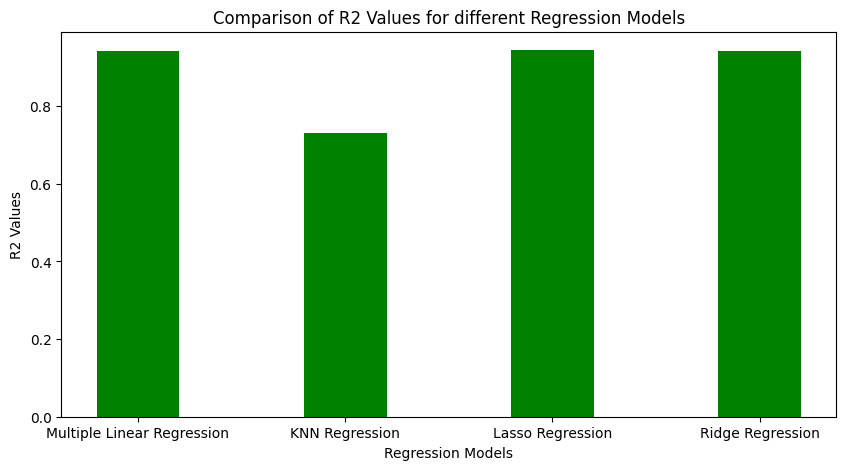

In [22]:
import matplotlib.pyplot as plt
 
# Data
R2_values = [r2_score(y_test, linear_reg_pred),r2_score(y_test, knn_reg_pred),r2_score(y_test, lasso_reg_pred),r2_score(y_test, ridge_reg_pred)]
models = ['Multiple Linear Regression', 'KNN Regression', 'Lasso Regression', 'Ridge Regression']
 
# Creating plot
fig = plt.figure(figsize=(10, 5))
plt.bar(models, R2_values, color='green', width=0.4)
 
# Add xticks to the plot
plt.xticks(models)
plt.xlabel("Regression Models")
plt.ylabel("R2 Values")
plt.title("Comparison of R2 Values for different Regression Models")
 
# Show plot
plt.show()